In [1]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/Colab Notebooks/NLP2

Mounted at /content/drive
/content/drive/MyDrive/Colab Notebooks/NLP2


In [ ]:
import pandas as pd

# Load the combined tweets CSV file
combined_tweets_loaded = pd.read_csv('combined_tweets.csv')

# Display basic information about the loaded data
print("**Loaded combined_tweets.csv successfully!**")
print(f"\nDataset shape: {combined_tweets_loaded.shape}")
print(f"Number of tweets: {len(combined_tweets_loaded)}")
print(f"\nColumns: {combined_tweets_loaded.columns.tolist()}")

# Show first few rows
print("\n**First 5 tweets:**")
print(combined_tweets_loaded.head())

# Check sentiment distribution
print("\n**Sentiment distribution:**")
print(combined_tweets_loaded['Sentiment'].value_counts())

# Display data types
print("\n**Data types:**")
print(combined_tweets_loaded.dtypes)

# Check for any missing values
print("\n**Missing values:**")
print(combined_tweets_loaded.isnull().sum())

# Example: Access specific tweets
print("\n**Example - First tweet:**")
print(f"Tweet: {combined_tweets_loaded.iloc[0]['Tweet']}")
print(f"Sentiment: {combined_tweets_loaded.iloc[0]['Sentiment']}")


**Loaded combined_tweets.csv successfully!**

Dataset shape: (17352, 2)
Number of tweets: 17352

Columns: ['Tweet', 'Sentiment']

**First 5 tweets:**
                                               Tweet Sentiment
0  THEY CALLED OFFSIDES ?!?!? \nNAH THIS IS RIGGE...  negative
1  I demand that only @shakira and @KNAAN be able...  negative
2  𝐉𝐮𝐬𝐭 𝐩𝐢𝐧𝐜𝐡𝐞𝐝 𝐨𝐮𝐫𝐬𝐞𝐥𝐯𝐞𝐬 𝐭𝐨 𝐜𝐡𝐞𝐜𝐤 𝐢𝐟 𝐢𝐭 𝐢𝐬 𝐫𝐞𝐚𝐥,...  positive
3  #Valencia was a former premier player #WorldCu...   neutral
4                     Corrupt already😂 #WorldCup2022  negative

**Sentiment distribution:**
Sentiment
negative    5784
positive    5784
neutral     5784
Name: count, dtype: int64

**Data types:**
Tweet        object
Sentiment    object
dtype: object

**Missing values:**
Tweet        0
Sentiment    0
dtype: int64

**Example - First tweet:**
Tweet: THEY CALLED OFFSIDES ?!?!? 
NAH THIS IS RIGGED #WorldCup2022
Sentiment: negative


In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd

# First, let's check the current distribution
print("**Original dataset info:**")
print(f"Total samples: {len(combined_tweets_loaded)}")
print("\nSentiment distribution:")
print(combined_tweets_loaded['Sentiment'].value_counts())

# Separate features and labels
X = combined_tweets_loaded['Tweet']
y = combined_tweets_loaded['Sentiment']

# First split: 70% train, 30% temp (which will be split into val and test)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y  # This ensures balanced classes
)

# Second split: Split the temp set (30%) into validation (15%) and test (15%)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp,
    test_size=0.5,  # 0.5 of 30% = 15% of total
    random_state=42,
    stratify=y_temp
)

# Create dataframes for each set
train_df = pd.DataFrame({'Tweet': X_train, 'Sentiment': y_train})
val_df = pd.DataFrame({'Tweet': X_val, 'Sentiment': y_val})
test_df = pd.DataFrame({'Tweet': X_test, 'Sentiment': y_test})

# Display the results
print("\n**Dataset Split Summary:**")
print("=" * 60)
print(f"Total samples: {len(combined_tweets_loaded)}")
print(f"Train set: {len(train_df)} samples ({len(train_df)/len(combined_tweets_loaded)*100:.1f}%)")
print(f"Validation set: {len(val_df)} samples ({len(val_df)/len(combined_tweets_loaded)*100:.1f}%)")
print(f"Test set: {len(test_df)} samples ({len(test_df)/len(combined_tweets_loaded)*100:.1f}%)")

# Show class distribution for each set
print("\n**Train Set Class Distribution:**")
train_counts = train_df['Sentiment'].value_counts().sort_index()
for sentiment, count in train_counts.items():
    percentage = (count / len(train_df)) * 100
    print(f"  {sentiment}: {count} ({percentage:.2f}%)")

print("\n**Validation Set Class Distribution:**")
val_counts = val_df['Sentiment'].value_counts().sort_index()
for sentiment, count in val_counts.items():
    percentage = (count / len(val_df)) * 100
    print(f"  {sentiment}: {count} ({percentage:.2f}%)")

print("\n**Test Set Class Distribution:**")
test_counts = test_df['Sentiment'].value_counts().sort_index()
for sentiment, count in test_counts.items():
    percentage = (count / len(test_df)) * 100
    print(f"  {sentiment}: {count} ({percentage:.2f}%)")

# Verify stratification worked correctly
print("\n**Verification - Class balance maintained:**")
print(f"Original positive ratio: {(combined_tweets_loaded['Sentiment']=='positive').sum()/len(combined_tweets_loaded)*100:.2f}%")
print(f"Train positive ratio: {(train_df['Sentiment']=='positive').sum()/len(train_df)*100:.2f}%")
print(f"Val positive ratio: {(val_df['Sentiment']=='positive').sum()/len(val_df)*100:.2f}%")
print(f"Test positive ratio: {(test_df['Sentiment']=='positive').sum()/len(test_df)*100:.2f}%")


**Original dataset info:**
Total samples: 17352

Sentiment distribution:
Sentiment
negative    5784
positive    5784
neutral     5784
Name: count, dtype: int64

**Dataset Split Summary:**
Total samples: 17352
Train set: 12146 samples (70.0%)
Validation set: 2603 samples (15.0%)
Test set: 2603 samples (15.0%)

**Train Set Class Distribution:**
  negative: 4049 (33.34%)
  neutral: 4049 (33.34%)
  positive: 4048 (33.33%)

**Validation Set Class Distribution:**
  negative: 867 (33.31%)
  neutral: 868 (33.35%)
  positive: 868 (33.35%)

**Test Set Class Distribution:**
  negative: 868 (33.35%)
  neutral: 867 (33.31%)
  positive: 868 (33.35%)

**Verification - Class balance maintained:**
Original positive ratio: 33.33%
Train positive ratio: 33.33%
Val positive ratio: 33.35%
Test positive ratio: 33.35%


In [ ]:
import torch
from transformers import (
    AutoTokenizer,
    AutoModelForSequenceClassification,
    TrainingArguments,
    Trainer,
    EarlyStoppingCallback
)
from datasets import Dataset, DatasetDict
import numpy as np
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import warnings
warnings.filterwarnings('ignore')

# Load tokenizer and model
tokenizer = AutoTokenizer.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment-latest")
model = AutoModelForSequenceClassification.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment-latest")

# Create label mappings
label2id = {"negative": 0, "neutral": 1, "positive": 2}
id2label = {0: "negative", 1: "neutral", 2: "positive"}

# Convert dataframes to HuggingFace datasets
train_dataset = Dataset.from_pandas(train_df)
val_dataset = Dataset.from_pandas(val_df)
test_dataset = Dataset.from_pandas(test_df)

# Create DatasetDict
dataset_dict = DatasetDict({
    'train': train_dataset,
    'validation': val_dataset,
    'test': test_dataset
})

# Tokenization function
def tokenize_function(examples):
    # Convert sentiment labels to numeric
    labels = [label2id[label] for label in examples['Sentiment']]

    # Tokenize the tweets
    encoding = tokenizer(
        examples['Tweet'],
        padding='max_length',
        truncation=True,
        max_length=128
    )

    # Add labels to encoding
    encoding['labels'] = labels

    return encoding

# Apply tokenization
tokenized_datasets = dataset_dict.map(
    tokenize_function,
    batched=True,
    remove_columns=['Tweet', 'Sentiment']
)

# Define metrics computation
def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)

    precision, recall, f1, _ = precision_recall_fscore_support(
        labels, predictions, average='weighted'
    )
    accuracy = accuracy_score(labels, predictions)

    return {
        'accuracy': accuracy,
        'f1': f1,
        'precision': precision,
        'recall': recall
    }

# Training arguments - Updated for validation loss monitoring
training_args = TrainingArguments(
    output_dir='./twitter-roberta-sentiment-finetuned',
    num_train_epochs=100,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=32,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=100,
    eval_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
    metric_for_best_model="eval_loss",  # Changed to monitor validation loss
    greater_is_better=False,  # Lower loss is better
    save_total_limit=3,
    fp16=True,
    report_to="none",
    push_to_hub=False,
)

# Initialize trainer with early stopping on validation loss
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets['train'],
    eval_dataset=tokenized_datasets['validation'],
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
    callbacks=[
        EarlyStoppingCallback(
            early_stopping_patience=5,  # Stop if val_loss doesn't improve for 5 epochs
            early_stopping_threshold=0.0001  # Minimum change to qualify as improvement
        )
    ]
)

# Train the model
print("Starting training...")
print("Early stopping configured: monitoring validation loss with patience=5")
print("-" * 60)

train_result = trainer.train()

# Print training results
print("\n**Training completed!**")
print(f"Training loss: {train_result.training_loss:.4f}")
print(f"Training runtime: {train_result.metrics['train_runtime']:.2f} seconds")
print(f"Training samples per second: {train_result.metrics['train_samples_per_second']:.2f}")
print(f"Total epochs trained: {trainer.state.epoch}")

# Get best validation loss
best_val_loss = min([log['eval_loss'] for log in trainer.state.log_history if 'eval_loss' in log])
print(f"Best validation loss: {best_val_loss:.4f}")


Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Map:   0%|          | 0/12146 [00:00<?, ? examples/s]

Map:   0%|          | 0/2603 [00:00<?, ? examples/s]

Map:   0%|          | 0/2603 [00:00<?, ? examples/s]

Starting training...
Early stopping configured: monitoring validation loss with patience=5
------------------------------------------------------------


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.401300,0.298562,0.880907,0.880140,0.881235,0.880907
2,0.278600,0.447014,0.849020,0.845970,0.853663,0.849020
3,0.244300,0.535635,0.851710,0.849596,0.852058,0.851710
4,0.201800,0.596982,0.870150,0.870099,0.870234,0.870150
5,0.140000,0.723465,0.863235,0.863342,0.864302,0.863235
6,0.097100,0.846850,0.856704,0.856156,0.856229,0.856704



**Training completed!**
Training loss: 0.2140
Training runtime: 786.96 seconds
Training samples per second: 1543.41
Total epochs trained: 6.0
Best validation loss: 0.2986


In [ ]:
# Save the best model
save_directory = "./twitter-roberta-sentiment-best"

print(f"\nSaving model to {save_directory}...")
trainer.save_model(save_directory)
tokenizer.save_pretrained(save_directory)

# Also save the model state dict separately
torch.save(model.state_dict(), f"{save_directory}/model_state_dict.pt")

print("Model saved successfully!")

# Save training history
import json
with open(f"{save_directory}/training_history.json", "w") as f:
    json.dump(trainer.state.log_history, f, indent=2)

print("Training history saved!")



Saving model to ./twitter-roberta-sentiment-best...
Model saved successfully!
Training history saved!


In [7]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

# Load the saved model and tokenizer
save_directory = "./twitter-roberta-sentiment-best"

print(f"Loading model from {save_directory}...")
loaded_tokenizer = AutoTokenizer.from_pretrained(save_directory)
loaded_model = AutoModelForSequenceClassification.from_pretrained(save_directory)

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
loaded_model = loaded_model.to(device)
loaded_model.eval()

print(f"Model loaded successfully and moved to {device}!")

id2label = {0: "negative", 1: "neutral", 2: "positive"}
label2id = {"negative": 0, "neutral": 1, "positive": 2}

Loading model from ./twitter-roberta-sentiment-best...
Model loaded successfully and moved to cpu!


Evaluating on test set...


Evaluating: 100%|██████████| 82/82 [00:16<00:00,  4.98it/s]



**Classification Report:**
              precision    recall  f1-score   support

    negative     0.9032    0.9136    0.9084       868
     neutral     0.8570    0.8085    0.8320       867
    positive     0.8820    0.9217    0.9014       868

    accuracy                         0.8813      2603
   macro avg     0.8807    0.8813    0.8806      2603
weighted avg     0.8807    0.8813    0.8806      2603



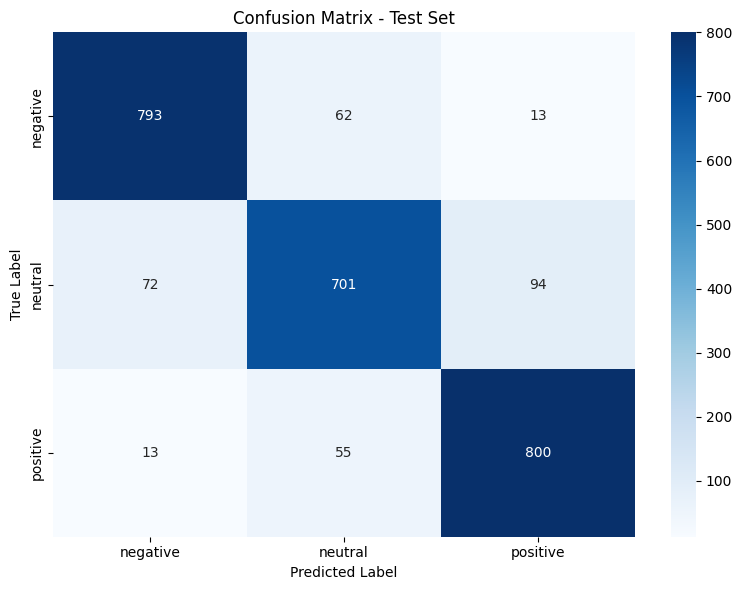


**Overall Test Accuracy: 0.8813**
Negative accuracy: 0.9136
Neutral accuracy: 0.8085
Positive accuracy: 0.9217

**Trainer Evaluation Results:**


eval_loss: 0.3012
eval_accuracy: 0.8813
eval_f1: 0.8806
eval_precision: 0.8807
eval_recall: 0.8813
eval_runtime: 4.5040
eval_samples_per_second: 577.9290
eval_steps_per_second: 18.2060
epoch: 6.0000


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

# Function to get predictions
def get_predictions(model, tokenizer, texts, batch_size=32):
    model.eval()
    predictions = []

    with torch.no_grad():
        for i in tqdm(range(0, len(texts), batch_size), desc="Evaluating"):
            batch_texts = texts[i:i+batch_size]
            inputs = tokenizer(
                batch_texts.tolist(),
                return_tensors="pt",
                padding=True,
                truncation=True,
                max_length=128
            )
            inputs = {k: v.to(device) for k, v in inputs.items()}

            outputs = model(**inputs)
            batch_predictions = torch.argmax(outputs.logits, dim=-1)
            predictions.extend(batch_predictions.cpu().numpy())

    return predictions

# Evaluate on test set
print("Evaluating on test set...")
test_texts = test_df['Tweet'].values
test_labels = [label2id[label] for label in test_df['Sentiment'].values]

# Get predictions
test_predictions = get_predictions(loaded_model, loaded_tokenizer, test_texts)

# Calculate metrics
print("\n**Classification Report:**")
print(classification_report(
    test_labels,
    test_predictions,
    target_names=['negative', 'neutral', 'positive'],
    digits=4
))

# Confusion Matrix
cm = confusion_matrix(test_labels, test_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['negative', 'neutral', 'positive'],
            yticklabels=['negative', 'neutral', 'positive'])
plt.title('Confusion Matrix - Test Set')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

# Calculate overall accuracy
accuracy = accuracy_score(test_labels, test_predictions)
print(f"\n**Overall Test Accuracy: {accuracy:.4f}**")

# Per-class accuracy
for i, label in enumerate(['negative', 'neutral', 'positive']):
    class_mask = np.array(test_labels) == i
    class_accuracy = accuracy_score(
        np.array(test_labels)[class_mask],
        np.array(test_predictions)[class_mask]
    )
    print(f"{label.capitalize()} accuracy: {class_accuracy:.4f}")

# Additional evaluation using Trainer
print("\n**Trainer Evaluation Results:**")
eval_results = trainer.evaluate(eval_dataset=tokenized_datasets['test'])
for key, value in eval_results.items():
    print(f"{key}: {value:.4f}")


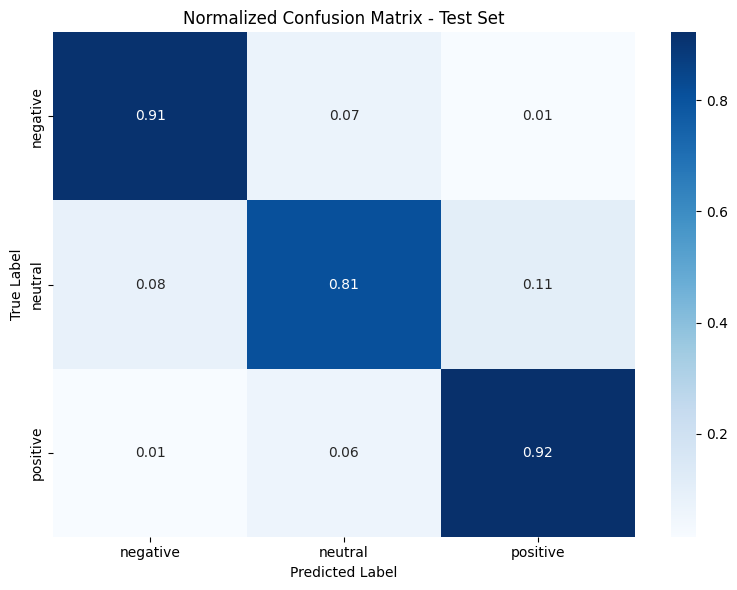

In [ ]:
# prompt: normalized confusion matrix

# Normalized Confusion Matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(8, 6))
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues',
            xticklabels=['negative', 'neutral', 'positive'],
            yticklabels=['negative', 'neutral', 'positive'])
plt.title('Normalized Confusion Matrix - Test Set')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

#Single Prediction

In [14]:
def predict_sentiment(text):
    # Tokenize et
    inputs = loaded_tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=128)
    inputs = {k: v.to(device) for k, v in inputs.items()}

    # Tahmin yap
    with torch.no_grad():
        outputs = loaded_model(**inputs)
        predictions = torch.nn.functional.softmax(outputs.logits, dim=-1)
        predicted_class = torch.argmax(predictions, dim=-1).item()

    confidence_scores = predictions.cpu().numpy()[0]
    return id2label[predicted_class], confidence_scores


text = "That penalty decision was fair."
sentiment, scores = predict_sentiment(text)

print(f"Metin: {text}")
print(f"Tahmin: {sentiment}")
print(f"Güven skorları - Negative: {scores[0]:.3f}, Neutral: {scores[1]:.3f}, Positive: {scores[2]:.3f}")

Metin: That penalty decision was fair.
Tahmin: neutral
Güven skorları - Negative: 0.226, Neutral: 0.443, Positive: 0.331
